In [1]:
import glob
import gc
import pandas as pd
import imageio
import random
import numpy as np
from scipy.io import loadmat
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
from sklearn.model_selection import train_test_split
from PIL import Image
print("imported")

imported


STEP 1: Extract data from .mat file

In [2]:
print("STEP 1: Extract data from .mat file")
metaData = loadmat("wiki_labeled.mat",squeeze_me=True, struct_as_record=True)
fullPath = metaData['wiki_labeled']['full_path'].item(0)
print(fullPath.shape)
print(fullPath[:10])
age = metaData['wiki_labeled']['age'].item(0)
m = len(age)
gc.collect()

STEP 1: Extract data from .mat file
(60327,)
['17/10000217_1981-05-05_2009.png' '12/100012_1948-07-03_2008.png'
 '65/10001965_1930-05-23_1961.png' '16/10002116_1971-05-31_2012.png'
 '02/10002702_1960-11-09_2012.png' '41/10003541_1937-09-27_1971.png'
 '39/100039_1904-12-07_1982.png' '13/10004113_1946-08-26_2007.png'
 '22/10004122_1982-03-17_2011.png' '99/10004299_1908-08-19_1950.png']


11

STEP 2: Extract images

In [ ]:
#Recommended code
n = 100
images = np.empty((m,n*n))
i=0
for f in fullPath:
    if (f == '63/670663_2015-02-16UTC08:04_1941.png'):
        f= '63/670663_2015-02-16UTC08_04_1941.png'
    im = imageio.imread(f'wiki_labeled/{f}')
    images[i] = im.flatten()    
    i = i + 1
#images = [imageio.imread(path).flatten() for path in glob.glob('wiki_labeled/*/*.png')]

print(len(images))
print(images[:5])
gc.collect()

In [ ]:
#np.savetxt('images.csv', images, delimiter=",", comments='')
#dataset = pd.read_csv("images.csv")

STEP 3: Split  the dataset (80%, 20%)

In [4]:
X = [x for x in images]
Y = [y for y in age]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.9) 
print(len(x_train))
print(x_train[:5])
print(len(x_test))
print(x_test[:5])
gc.collect()

6032
[array([33., 21., 18., ..., 63., 54., 30.]), array([48., 49., 49., ..., 80., 79., 33.]), array([56., 56., 56., ..., 47., 47., 46.]), array([223., 222., 223., ...,  45.,  45.,  34.]), array([ 23.,  23.,  24., ..., 199., 224., 236.])]
54295
[array([26., 29., 31., ..., 35., 39., 52.]), array([0., 0., 0., ..., 0., 0., 0.]), array([ 99., 113., 122., ...,  51.,  72.,  78.]), array([154., 114.,  95., ...,  21.,  12.,  12.]), array([183., 183., 201., ..., 253., 247., 240.])]


0

STEP 4: Compute Covariance Matrix, EigenVectors, EigenFaces

In [5]:
print("STEP 4: Obtain the Covariance matrix, eigen values and eigen vectors")
print("***The x_train matrix is the matrix of m x n2 (48,261 rows, 10,000 columns)")
print("***The C = 1/m-1(A.T*A) is a n2 x n2 matrix (10,000 rows, 10,000 columns)")
k = 50
def pca(X, n_pc):
    mean = np.mean(X, axis=0)
    centered_data = X - mean
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:, :n_pc]*S[:n_pc]
    eigenvalues = S[:n_pc]**2/np.sum(S[:n_pc]**2)
    return projected, components, eigenvalues, mean, centered_data
n_components = 50
n_samples = len(x_train)
h = 100
w = 100
X = np.array(x_train).reshape(n_samples, h*w)
P, C, EV, M, Y = pca(X, n_pc = n_components)
eigenFaces = C.reshape((n_components, h, w))
eigenValues = EV
projected = P
print("eigenFaces.shape: ", eigenFaces.shape)
print(eigenFaces[3])
print("eigenValues.shape: ", eigenValues.shape)
print(eigenValues[3])
print("projected.shape: ", projected.shape)
eigenface_titles = ["eigenface %d" %i for i in range(eigenFaces.shape[0])]
gc.collect()

STEP 4: Obtain the Covariance matrix, eigen values and eigen vectors
***The x_train matrix is the matrix of m x n2 (48,261 rows, 10,000 columns)
***The C = 1/m-1(A.T*A) is a n2 x n2 matrix (10,000 rows, 10,000 columns)
eigenFaces.shape:  (50, 100, 100)
[[ 0.00470659  0.00516938  0.0054621  ... -0.00980008 -0.00949598
  -0.0093281 ]
 [ 0.00506695  0.00559349  0.00578531 ... -0.00983872 -0.00958848
  -0.00944821]
 [ 0.00532491  0.00574864  0.00597169 ... -0.00987974 -0.00960249
  -0.00941564]
 ...
 [ 0.0107459   0.01107202  0.01116815 ... -0.01189639 -0.0116475
  -0.0116065 ]
 [ 0.01034681  0.01079479  0.01081915 ... -0.01163128 -0.01151705
  -0.01154413]
 [ 0.01009401  0.0103397   0.01051308 ... -0.01127071 -0.01129132
  -0.01144347]]
eigenValues.shape:  (50,)
0.05335300045217878
projected.shape:  (6032, 50)


0

STEP 7: Draw scree-plot to choose the best value of k

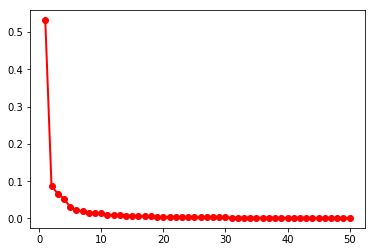

In [6]:
plt.plot(np.arange(k) + 1, eigenValues,'ro-', linewidth=2)

STEP 8: Show 20 ghosts

STEP 8: Show 20 ghosts


C:\Users\Mien\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


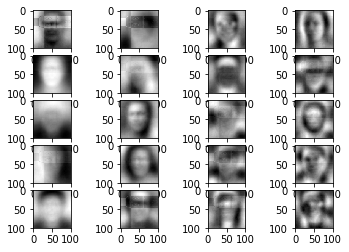

In [8]:
print("STEP 8: Show 20 ghosts")
k = 20
imageHeight = 100
imageWidth = 100
#fileName = 1
def plotImages(listOfImages,listOfTitles, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols)
    for i, image in zip (range(len(listOfImages)),listOfImages):
        #imageio.imwrite(f'{fileName}.png', i)
        #fileName += 1
        tmp = axes[i%nrows][i//nrows].imshow(image, cmap = 'gray') 
        tmp.title = listOfTitles[i]
    fig.show()
eigenFaces = eigenFaces[:k]
eigenTitles = ["eigenface %d"% i for i in range(len(eigenFaces))]
plotImages(eigenFaces, eigenTitles, 5, 4)


recovered_images.shape:  (6032, 100, 100)


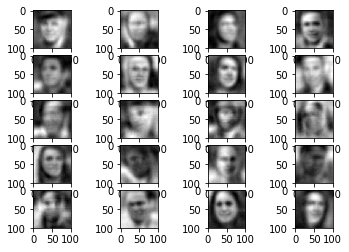

In [11]:
def reconstruction(Y, C, M, h, w, image_index):
    weights = np.dot(Y, C.T)#weights has shape = [n_samples,k dimension] = [6k,20]
    centered_vector = np.dot(weights[image_index, :], C) #centered_vector has shape = [n_samples,n*n dimension] = [6k,10k]
    recovered_image = (M + centered_vector).reshape(h, w) #recoved_image has shape = [n_samples,n*n dimension] = [6k,10k]
    return recovered_image
recovered_images = [reconstruction(Y, C, M, h, w, i) for i in range(len(x_train))]
print("recovered_images.shape: ", np.array(recovered_images).shape)
imageNames = metaData['wiki_labeled']['name'].item(0)
plotImages(recovered_images[:20], imageNames, 5, 4)
    

In [ ]:
print("STEP 9: Project the training and test images on to the eigenfaces to reduce dimensionality")
averageFace = np.mean(images, axis=0)
zeroMeanFaces = images - averageFace
finalFaces = np.dot(eigenFaces,zeroMeanFaces.T)
print("finalData.shape: ", finalFaces.shape)

In [ ]:
print("STEP 10: Perform SGD")
#Faces matrix has changed to finalFaces, need to split the dataset again to perform SGD
X_final = [x for x in finalFaces]
Y_final = [y for y in age]
x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(X_final, Y_final, test_size=0.2)
#Add x0 to the X matrix
print("***To prepare for the Gradient Descent Algorithm in the next step, it needs to add x0 vector (x0 = 1) to the X matrix")
for tup in x_train_final:
    tup.insert(0,1)
#Initialize the W vector, 20 entries corresponding to 20 features(w0, w1,..., w20)
W = []
W = [random.random()*random.randint(1,10) for x in range(21)]
#Pick the learning rate
learning_rate = 0.5
print("******Pick learning rate: ", learning_rate)
#Pick the iterations
iterations = 100
print("******Pick number of iterations: ", iterations)
#Execute Stochastic Gradient Descent
print("******Start Stochastic Gradient Descent algorithm")
gradient = f(W)
print("gradient: ", gradient)
W = SGD(f, W, learning_rate, iterations)
print("***W = ", W)
def SGD(f, w0, alpha, num_iters):
    start_iter = 0
    w = w0
    for i in xrange(start_iter + 1, num_iters + 1):
        grad = f(w)
        w = w - (alpha*grad)
    return w
def getRandomSample(Y, X):
    x_random_index = random.randrange(len(X))
    x_random = X[x_random_index]
    #x_random = np.array([random.choice(X)])
    print("x_random: ", x_random)
    #X = np.array(X)
    #x_random_index = np.where(X==x_random)
    print("x_random_index: ", x_random_index)
    y_random = Y[x_random_index]
    print("y_random: ", y_random)
    return y_random, x_random
def f(weight_vector):
    Y, X = getRandomSample(y_train_final, x_train_final)
    print("Y, X: ", Y, X)
    weight_vector = np.array(weight_vector)
    print(weight_vector.shape)
    print(weight_vector)
    y_hat = np.array(np.dot(X, weight_vector))
    print("y_hat: ", y_hat)
    print("y_hat - Y: ", y_hat - np.array(Y))
    grad = np.dot(X.T,y_hat-np.array(Y))
    return grad


In [ ]:
STEP 11: Predict Age

In [ ]:
print("STEP 11: Predict Age")
def predictY(x, weight_vector):
    result = []
    for i in range (len(np.array(x))):
        temp = 0
        for j in range (len(np.array(weight_vector))):
            temp = temp + weight_vector[j]*x[i][j]
        result.append(temp)
    #print("***y_predicted, 5 rows: ", result[:5])
    return(result)
#Add x0 to the X matrix
print("To prepare for the Gradient Descent Algorithm in the next step, it needs to add x0 vector (x0 = 1) to the X matrix")
for tup in x_test_final:
    tup.insert(0,1)
y_predicted = predictY(x_test_final, W)
print("***y_predicted, 5 rows: ", y_predicted[:5])
#--------------------------------------------------------------------
RMSE = 0
def root_mean_sqr_err(predicted, real):
    result = 0
    temp = []
    m = np.array(real).size
    for i in range(m):
        dif = math.pow(predicted[i] - real[i],2)
        temp.append(dif)
    result = math.pow(sum(temp)/m,1/2)
    return result
RMSE = root_mean_sqr_err(y_predicted, y_test_final)
print("***RMSE(testing) - Root Mean Square Error: ", RMSE)
#Store the RMSE in an array
RMSE_array = []
RMSE_array.append(RMSE)


In [ ]:
print("STEP12: Preprocess the wiki_judge_images.zip file")
print("***Read data in wiki_judge_images.zip file")
judge_metaData = loadmat("wiki_judgeX.mat",squeeze_me=True, struct_as_record=True)
judge_fullPath = metaData['wiki_judge_images']['full_path'].item(0)
judge_name = metaData['wiki_judge_images']['name'].item(0)
print(judge_fullPath.shape)
print(judge_fullPath[:10])
gc.collect()
n = 100
m = len(judge_name)
judge_images = np.empty((m,n*n))
i=0
for f in judge_fullPath:
    im = imageio.imread(f'wiki_judge_images/{f}')
    judge_images[i] = im.flatten()    
    i = i + 1

print(len(judge_images))
print(judge_images[:5])
gc.collect()
print("***Reduce judge_images dimension")
judge_n_components = 20
h = 100
w = 100
judge_P, judge_C, judge_EV, judge_M, judge_Y = pca(judge_images, n_pc = judge_n_components)
judge_eigenFaces = judge_C.reshape((judge_n_components, h, w))
print("***Project judge faces to obtain final judge faces")
judge_averageFace = np.mean(judge_images, axis=0)
judge_zeroMeanFaces = judge_images - judge_averageFace
judge_finalFaces = np.dot(judge_eigenFaces,judge_zeroMeanFaces.T)
print("judge_finalFaces.shape: ", judge_finalFaces.shape)
#Add x0 to the X matrix
print("***To prepare for the Gradient Descent prediction in the next step, it needs to add X0 vector (X0 = 1) to the X matrix")
for tup in judge_finalFaces:
    tup.insert(0,1)
judge_y_predicted = []
judge_y_predicted = predictY(judge_finalFaces, W)




In [ ]:
print("***Save predicted result to file...")
judge_y_predicted_to_save = np.array(judge_y_predicted)
temp = []
i = 0
for tup in judge_y_predicted_to_save:
    b = [] 
    b.append(i)
    b.append(tup)
    temp.append(b)
    i = i + 1
judge_y_predicted_to_save = temp
print(judge_y_predicted_to_save[:5])
run = 1
np.savetxt(f'submission.csv', judge_y_predicted_to_save, fmt = "%i,%f", delimiter=",", header="ID,AGE", comments='')



